<a href="https://colab.research.google.com/github/nabilaalifia/CNN-FCN-for-image-classification/blob/main/CNN%2BFCN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/Daun

/content/drive/.shortcut-targets-by-id/750/Daun


In [4]:
ls


GMB_01/  GMB_03/  GMB_05/  GMB_07/  GMB_09/


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("wait for loading images.......")
imagePaths = paths.list_images("/content/drive/MyDrive/Colab Notebooks/Daun")
data = []
labels = []

wait for loading images.......


In [10]:
# loop over the input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, 
  # scale the pixel intensities to the range [0, 1], 
	# and then update the images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((32, 32))) / 255.0 #normalization
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [11]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [12]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [13]:
# perform a training and testing split, using 85% of the data for
# using 85% of the data for training and 15% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.15, shuffle=True)
print(trainX.shape)
print(testX.shape)

(497, 32, 32, 3)
(88, 32, 32, 3)


In [25]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(4,4))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(4,4))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [21]:
# train the model using the Adam optimizer

opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=16)

Epoch 1/50
32/32 [==============================] - 0s 15ms/step - loss: 1.6017 - accuracy: 0.2596 - val_loss: 1.5753 - val_accuracy: 0.2500
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 1.5450 - accuracy: 0.3400 - val_loss: 1.5159 - val_accuracy: 0.3977
Epoch 3/50
32/32 [==============================] - 0s 11ms/step - loss: 1.3887 - accuracy: 0.4628 - val_loss: 1.3628 - val_accuracy: 0.3977
Epoch 4/50
32/32 [==============================] - 0s 11ms/step - loss: 1.1893 - accuracy: 0.5070 - val_loss: 1.2131 - val_accuracy: 0.4545
Epoch 5/50
32/32 [==============================] - 0s 11ms/step - loss: 1.0579 - accuracy: 0.5936 - val_loss: 1.0994 - val_accuracy: 0.5000
Epoch 6/50
32/32 [==============================] - 0s 11ms/step - loss: 0.9770 - accuracy: 0.6117 - val_loss: 0.9993 - val_accuracy: 0.5909
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 0.9197 - accuracy: 0.6479 - val_loss: 1.0394 - val_accuracy: 0.5682
Epoch 8/50
32

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


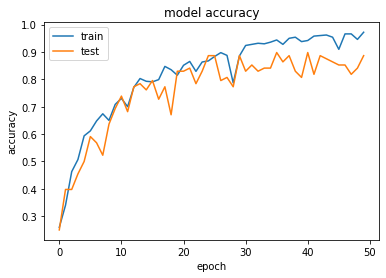

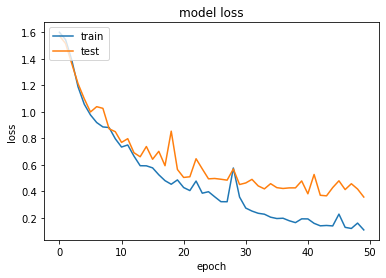

In [22]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [23]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.81      0.87      0.84        15
      GMB_03       0.91      0.91      0.91        23
      GMB_05       0.86      0.92      0.89        13
      GMB_07       0.86      0.86      0.86        22
      GMB_09       1.00      0.87      0.93        15

    accuracy                           0.89        88
   macro avg       0.89      0.89      0.89        88
weighted avg       0.89      0.89      0.89        88

